# Machine Learning on PGA Tour - Exploratory Data Analysis

In this notebook we will try to get an overview of the data using visualization and statistical methods before we proceed to the machine learning models.

In [16]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
df = pd.read_csv("../data/pga_data.csv")
df

,Name,Season,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Spin Rate,Eligible
0,Justin Thomas,2017,1,309.1,54.64,116.52,174.84,2320.1,1.0
1,Jordan Spieth,2017,2,294.6,58.67,112.66,168.55,2439.6,1.0
2,Xander Schauffele,2017,3,306.5,58.80,118.33,174.24,2518.8,1.0
3,Dustin Johnson,2017,4,314.8,54.02,121.45,180.66,2499.9,1.0
4,Jon Rahm,2017,5,305.3,58.27,116.42,174.53,2193.0,1.0
...,...,...,...,...,...,...,...,...,...
611,C.T. Pan,2021,121,296.3,61.03,111.20,167.34,2129.2,-1.0
612,Matt Kuchar,2021,122,288.0,65.81,108.60,162.18,2419.4,-1.0
613,Brice Garnett,2021,123,288.1,70.86,109.53,164.71,2539.5,-1.0
614,Scott Stallings,2021,124,298.2,58.83,115.96,173.80,2516.0,-1.0


Kernel Density Estimations:

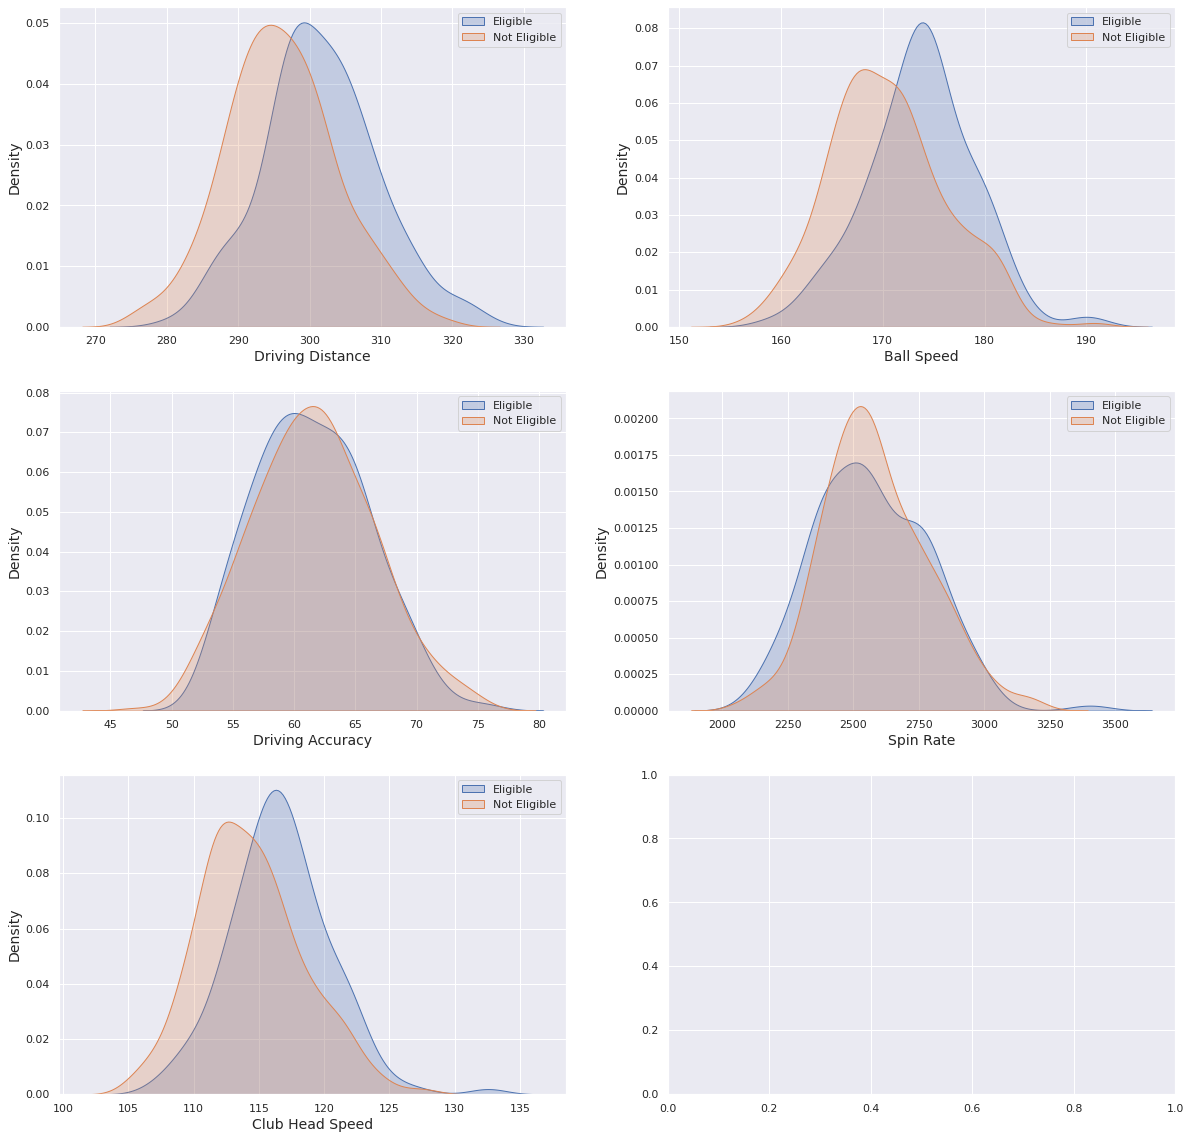

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
i = 0
j = 0
for label in ["Driving Distance", "Driving Accuracy", "Club Head Speed", "Ball Speed", "Spin Rate"]:
    sns.kdeplot(df[df["Eligible"] == 1][label], ax=axes[i, j], shade=True, label="Eligible")
    sns.kdeplot(df[df["Eligible"] == -1][label], ax=axes[i, j], shade=True, label="Not Eligible")
    axes[i, j].legend()
    if i == 2:
        j += 1
        i = 0
    else:
        i += 1

Linear Dependencies of the Features:

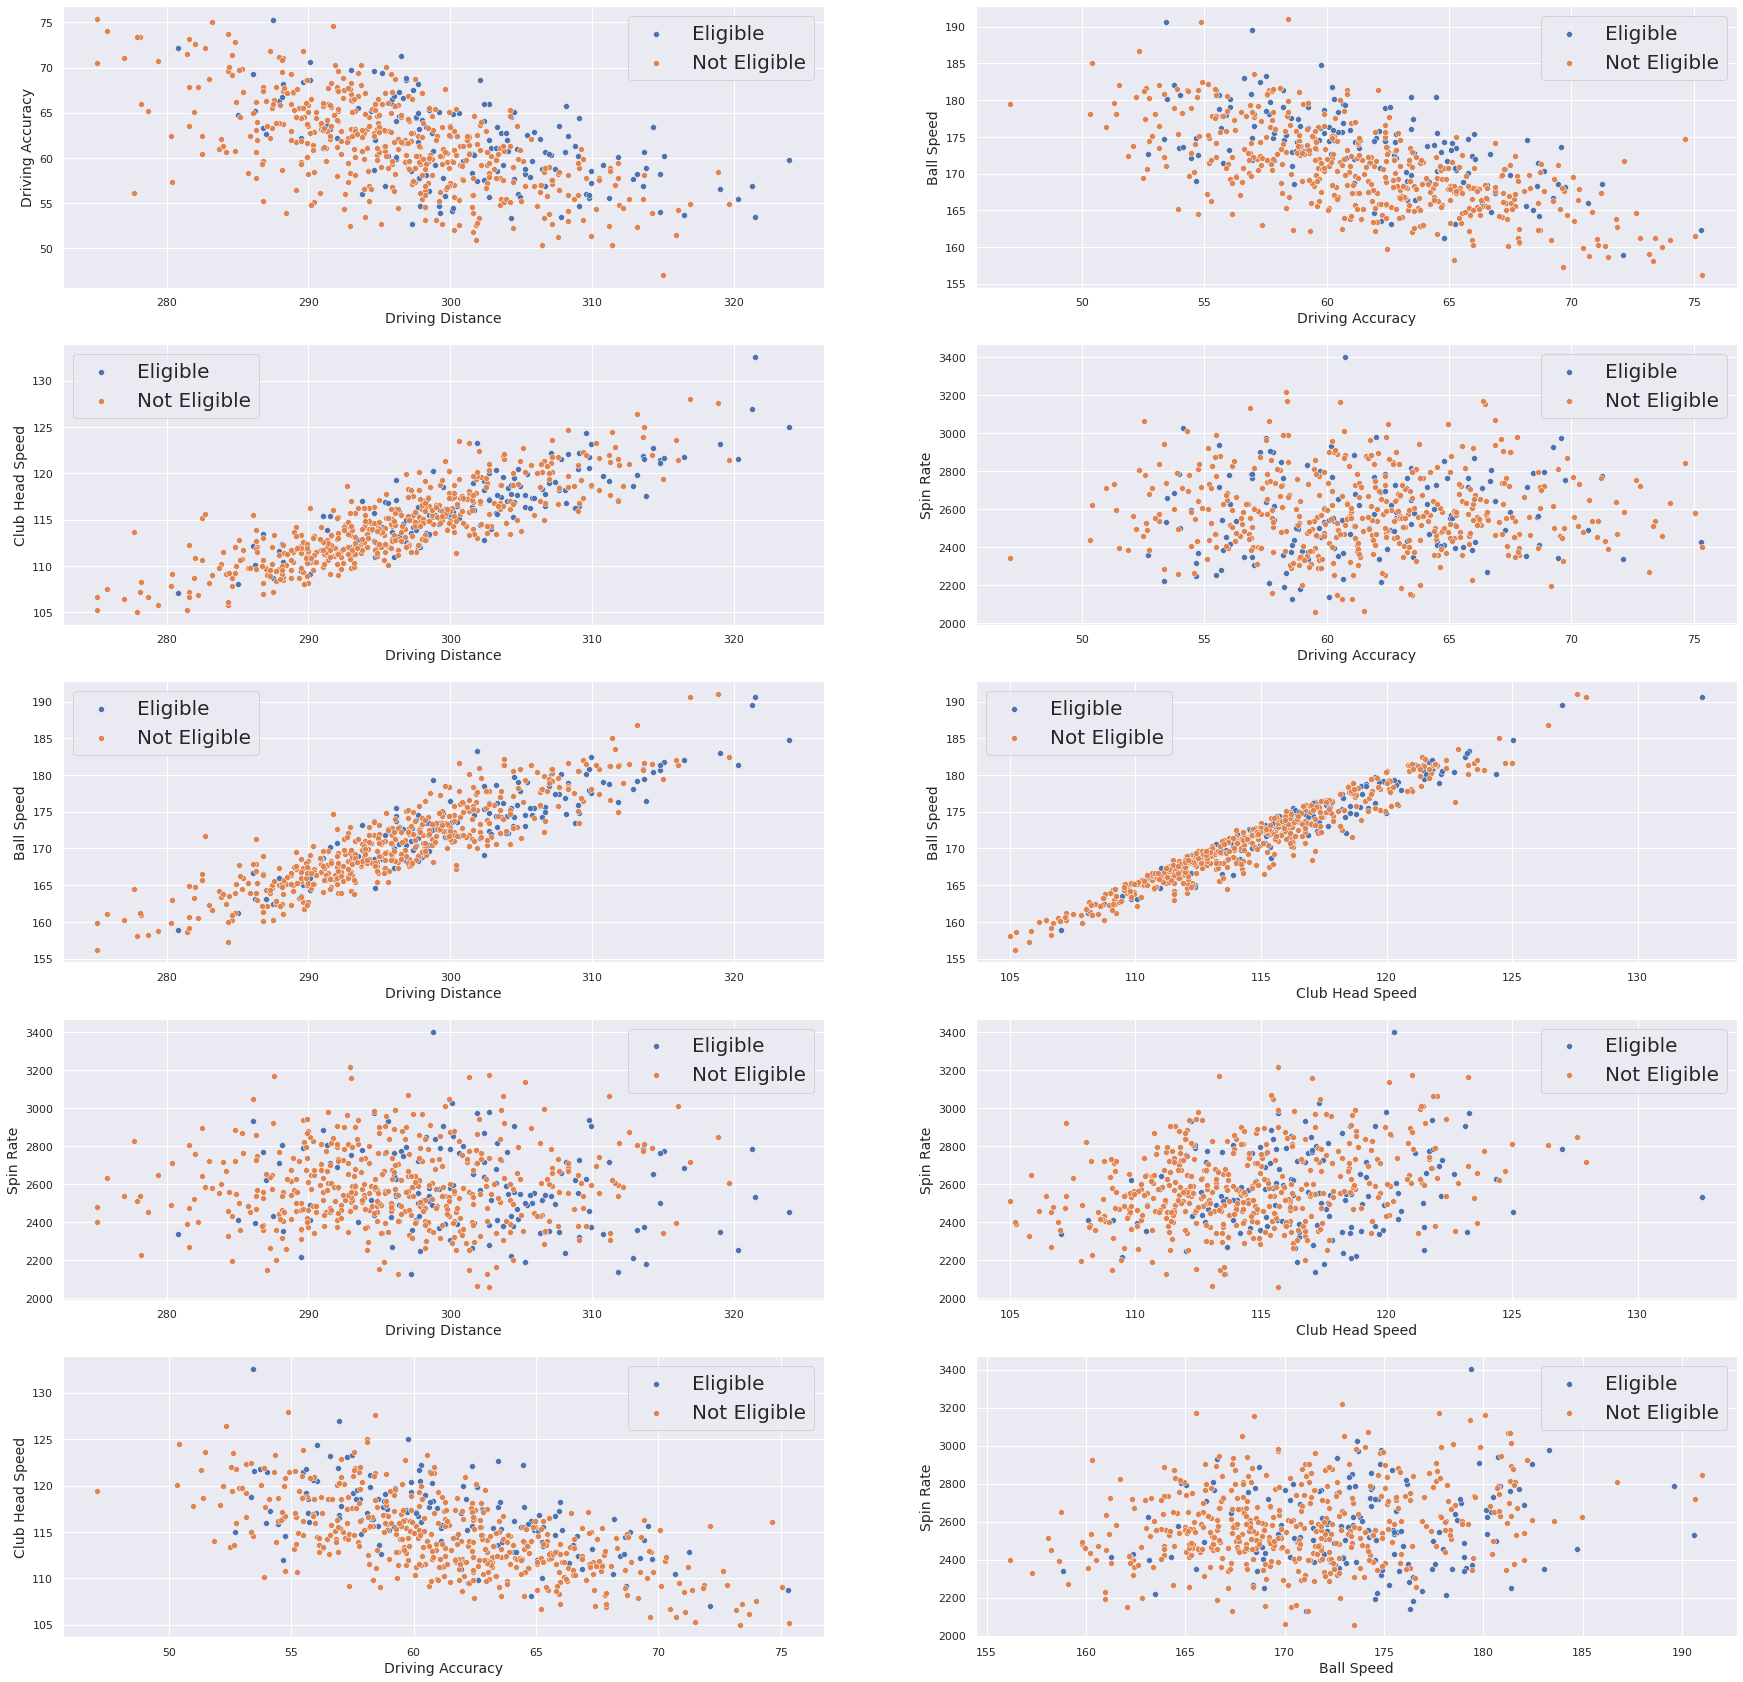

In [20]:
import itertools

columns = df.columns[3:8]
i = 0
j = 0

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
plt.rcParams['axes.labelsize'] = 14

for pair in itertools.combinations(columns, 2):
    sns.scatterplot(x=df[df["Eligible"] == 1][pair[0]], y=df[df["Eligible"] == 1][pair[1]], ax=axes[i, j], label="Eligible")
    sns.scatterplot(x=df[df["Eligible"] == -1][pair[0]], y=df[df["Eligible"] == -1][pair[1]], ax=axes[i, j], label="Not Eligible")
    axes[i, j].legend(prop={'size': 20})
    if i == 4:
        j += 1
        i = 0
    else:
        i += 1

There seems to be a lot of multicollinearity between some of the features (e.g., Club Head Speed and Ball Speed). However, as we are not interested in individual feature parameter estimates, this shouldn't be a problem.